<a href="https://colab.research.google.com/github/researchandIA/prueba_neural/blob/main/redes_neuronales_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def abrir_matrices(m1,m2):
    import csv

    with open(m1,newline='') as f:
        reader= csv.reader(f)
        data = list(reader)

    
    with open(m2,newline='') as f:
        reader= csv.reader(f)
        data2 = list(reader)
    
    return (data,data2)
b
m1="CSV//matriz_nok_v1.csv"
m2="CSV//matriz_ok_v1.csv"
m1_t="CSV//matriz_nok_y_v1.csv"
m2_t="CSV//matriz_ok_y_v1.csv"




a,b = abrir_matrices(m1,m2)
c,d = abrir_matrices(m1_t,m2_t)



a=np.asarray(a).astype(int)
b=np.asarray(b).astype(int)
c=np.asarray(c).astype(int)
d=np.asarray(d).astype(int)


print("forma de a:",a.shape)
print("forma de b:",b.shape)
print("forma de c:",c.shape)
print("forma de d:",d.shape)

print(a)


forma de a: (40, 50)
forma de b: (40, 50)
forma de c: (1, 50)
forma de d: (1, 50)
[[ 8 36  4 ... 11 40 18]
 [ 7  0 32 ... 14  0 32]
 [22 36 22 ...  0  0 28]
 ...
 [21  0  0 ...  4 10  0]
 [26  0  8 ...  0 12  0]
 [ 0  0  0 ...  6 40 36]]


In [ ]:
# Import packages
import os as os


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set_context("notebook")
plt.style.use("fivethirtyeight") 


# Initialize parameters
def initialize_parameters(layers_dims):
    
    np.random.seed(1)               
    parameters = {}
    L = len(layers_dims)            

    for l in range(1, L):           
        parameters["W" + str(l)] = np.random.randn(
            layers_dims[l], layers_dims[l - 1]) * 0.01
        parameters["b" + str(l)] = np.zeros((layers_dims[l], 1))

        assert parameters["W" + str(l)].shape == (
            layers_dims[l], layers_dims[l - 1])
        assert parameters["b" + str(l)].shape == (layers_dims[l], 1)

    return parameters

In [ ]:
# Define activation functions that will be used in forward propagation
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))

    return A, Z


def tanh(Z):
    A = np.tanh(Z)

    return A, Z


def relu(Z):
    A = np.maximum(0, Z)

    return A, Z


def leaky_relu(Z):
    A = np.maximum(0.1 * Z, Z)

    return A, Z


In [ ]:
# Define helper functions that will be used in L-model forward prop
def linear_forward(A_prev, W, b):
    Z = np.dot(W, A_prev) + b
    cache = (A_prev, W, b)

    return Z, cache


def linear_activation_forward(A_prev, W, b, activation_fn):
    assert activation_fn == "sigmoid" or activation_fn == "tanh" or \
        activation_fn == "relu"

    if activation_fn == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

    elif activation_fn == "tanh":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = tanh(Z)

    elif activation_fn == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    assert A.shape == (W.shape[0], A_prev.shape[1])

    cache = (linear_cache, activation_cache)

    return A, cache


def L_model_forward(X, parameters, hidden_layers_activation_fn="relu"):
    A = X                           
    caches = []                     
    L = len(parameters) // 2        

    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(
            A_prev, parameters["W" + str(l)], parameters["b" + str(l)],
            activation_fn=hidden_layers_activation_fn)
        caches.append(cache)

    AL, cache = linear_activation_forward(
        A, parameters["W" + str(L)], parameters["b" + str(L)],
        activation_fn="sigmoid")
    caches.append(cache)

    assert AL.shape == (1, X.shape[1])

    return AL, caches


In [ ]:
# Compute cross-entropy cost
def compute_cost(AL, y):
    m = y.shape[1]              
    cost = - (1 / m) * np.sum(
        np.multiply(y, np.log(AL)) + np.multiply(1 - y, np.log(1 - AL)))

    return cost

In [ ]:
# Define derivative of activation functions w.r.t z that will be used in back-propagation
def sigmoid_gradient(dA, Z):
    A, Z = sigmoid(Z)
    dZ = dA * A * (1 - A)

    return dZ


def tanh_gradient(dA, Z):
    A, Z = tanh(Z)
    dZ = dA * (1 - np.square(A))

    return dZ


def relu_gradient(dA, Z):
    A, Z = relu(Z)
    dZ = np.multiply(dA, np.int64(A > 0))

    return dZ


# define helper functions that will be used in L-model back-prop
def linear_backword(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1 / m) * np.dot(dZ, A_prev.T)
    db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)

    assert dA_prev.shape == A_prev.shape
    assert dW.shape == W.shape
    assert db.shape == b.shape

    return dA_prev, dW, db


def linear_activation_backward(dA, cache, activation_fn):
    linear_cache, activation_cache = cache

    if activation_fn == "sigmoid":
        dZ = sigmoid_gradient(dA, activation_cache)
        dA_prev, dW, db = linear_backword(dZ, linear_cache)

    elif activation_fn == "tanh":
        dZ = tanh_gradient(dA, activation_cache)
        dA_prev, dW, db = linear_backword(dZ, linear_cache)

    elif activation_fn == "relu":
        dZ = relu_gradient(dA, activation_cache)
        dA_prev, dW, db = linear_backword(dZ, linear_cache)

    return dA_prev, dW, db


def L_model_backward(AL, y, caches, hidden_layers_activation_fn="relu"):
    y = y.reshape(AL.shape)
    L = len(caches)
    grads = {}

    dAL = np.divide(AL - y, np.multiply(AL, 1 - AL))

    grads["dA" + str(L - 1)], grads["dW" + str(L)], grads[
        "db" + str(L)] = linear_activation_backward(
            dAL, caches[L - 1], "sigmoid")

    for l in range(L - 1, 0, -1):
        current_cache = caches[l - 1]
        grads["dA" + str(l - 1)], grads["dW" + str(l)], grads[
            "db" + str(l)] = linear_activation_backward(
                grads["dA" + str(l)], current_cache,
                hidden_layers_activation_fn)

    return grads


# define the function to update both weight matrices and bias vectors
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2

    for l in range(1, L + 1):
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * grads["db" + str(l)]

    return parameters

In [ ]:
X_train=a
y_train=c
X_test=b
y_test=d


print("forma de X_train:",X_train.shape)
print("forma de y_train:",y_train.shape)
print("forma de X_test:",X_test.shape)
print("forma de y_test:",y_test.shape)

print(f"""Original dimensions:\n{20 * '-'}\nTraining: {X_train.shape}, {y_train.shape}
Test: {X_test.shape}, {y_test.shape}""")


# HAY QUE TRASPONER EN LA MATRIZ DE DATOS LOS VALORES, EN LA DE LABELS NO HACE FALTA


X_train = X_train.reshape(50, -1).T
y_train = y_train.reshape(-1, 50)

X_test = X_test.reshape(50, -1).T
y_test = y_test.reshape(-1, 50)





print(f"""\nNew dimensions:\n{15 * '-'}\nTraining: {X_train.shape}, {y_train.shape}
Test: {X_test.shape}, {y_test.shape}""")

forma de X_train: (40, 50)
forma de y_train: (1, 50)
forma de X_test: (40, 50)
forma de y_test: (1, 50)
Original dimensions:
--------------------
Training: (40, 50), (1, 50)
Test: (40, 50), (1, 50)

New dimensions:
---------------
Training: (40, 50), (1, 50)
Test: (40, 50), (1, 50)


In [ ]:
def L_layer_model(
        X, y, layers_dims, learning_rate=0.01, num_iterations=3000, num_iterations1=20,
        print_cost=True, hidden_layers_activation_fn="relu"):
  
    np.random.seed(1)

    # initialize parameters
    parameters = initialize_parameters(layers_dims)

    # intialize cost list
    cost_list = []

    # iterate over num_iterations
    for j in range(num_iterations1):
        learning_rate=learning_rate/2.5
        # iterate over num_iterations
        for i in range(num_iterations):
            # iterate over L-layers to get the final output and the cache
            AL, caches = L_model_forward(X, parameters, hidden_layers_activation_fn)
            # compute cost to plot it
            cost = compute_cost(AL, y)
            # iterate over L-layers backward to get gradients
            grads = L_model_backward(AL, y, caches, hidden_layers_activation_fn)
            # update parameters
            parameters = update_parameters(parameters, grads, learning_rate)
            # append each 100th cost to the cost list
            if (i + 1) % 100 == 0 and print_cost:
                print(f"The {j} cost after {i + 1} iterations is: {cost:.10f}")
            if i % 100 == 0:
                cost_list.append(cost)

    # plot the cost curve
    plt.figure(figsize=(10, 6))
    plt.plot(cost_list)
    plt.xlabel("Iterations (per hundreds)")
    plt.ylabel("Loss")
    plt.title(f"Loss curve for the learning rate = {learning_rate}")

    return parameters


def accuracy(X, parameters, y, activation_fn="relu"):
 
    probs, caches = L_model_forward(X, parameters, activation_fn)
    print("probs: ", str(probs))
    labels = (probs >= 0.5) * 1
    accuracy = np.mean(labels == y) * 100

    return f"The accuracy rate is: {accuracy:.2f}%."

In [ ]:
layers_dims = [X_train.shape[0], 5, 5, 1]



print("forma de X_train:",X_train.shape)
print("forma de y_train:",y_train.shape)
print("forma de X_test:",X_test.shape)
print("forma de y_test:",y_test.shape)

forma de X_train: (40, 50)
forma de y_train: (1, 50)
forma de X_test: (40, 50)
forma de y_test: (1, 50)


The 0 cost after 100 iterations is: 0.0895829793
The 0 cost after 200 iterations is: 0.0271794332
The 0 cost after 300 iterations is: 0.0144136157
The 0 cost after 400 iterations is: 0.0095420118
The 0 cost after 500 iterations is: 0.0070523527
The 0 cost after 600 iterations is: 0.0055605277
The 0 cost after 700 iterations is: 0.0045735108
The 0 cost after 800 iterations is: 0.0038749866
The 0 cost after 900 iterations is: 0.0033559831
The 0 cost after 1000 iterations is: 0.0029559271
The 0 cost after 1100 iterations is: 0.0026385736
The 0 cost after 1200 iterations is: 0.0023809566
The 0 cost after 1300 iterations is: 0.0021678425
The 0 cost after 1400 iterations is: 0.0019887410
The 0 cost after 1500 iterations is: 0.0018361993
The 0 cost after 1600 iterations is: 0.0017047812
The 0 cost after 1700 iterations is: 0.0015904306
The 0 cost after 1800 iterations is: 0.0014900616
The 0 cost after 1900 iterations is: 0.0014012854
The 0 cost after 2000 iterations is: 0.0013222250
The 0 cos

'The accuracy rate is: 100.00%.'

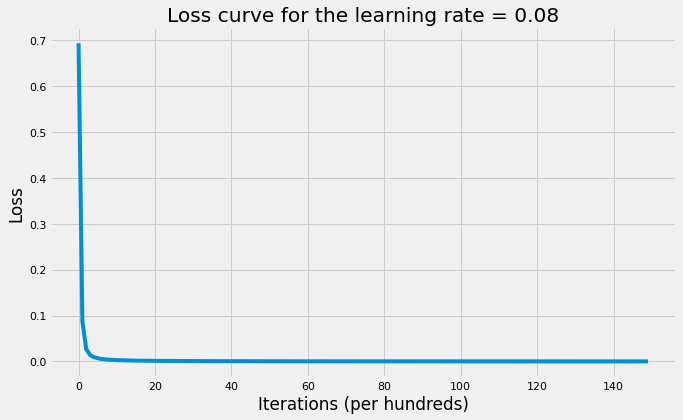

In [ ]:
# NN with tanh activation fn
parameters_tanh = L_layer_model(
    X_train, y_train, layers_dims, learning_rate=0.2, num_iterations=15000, num_iterations1=1,
    hidden_layers_activation_fn="tanh")

# Print the accuracy
accuracy(X_test, parameters_tanh, y_test, activation_fn="tanh")

The 0 cost after 100 iterations is: 0.0002485833
The 0 cost after 200 iterations is: 0.0000940070
The 0 cost after 300 iterations is: 0.0000558160
The 0 cost after 400 iterations is: 0.0000390482
The 0 cost after 500 iterations is: 0.0000297560
The 0 cost after 600 iterations is: 0.0000238981
The 0 cost after 700 iterations is: 0.0000198882
The 0 cost after 800 iterations is: 0.0000169815
The 0 cost after 900 iterations is: 0.0000147835
The 0 cost after 1000 iterations is: 0.0000130668
The 0 cost after 1100 iterations is: 0.0000116911
The 0 cost after 1200 iterations is: 0.0000105654
The 0 cost after 1300 iterations is: 0.0000096284
The 0 cost after 1400 iterations is: 0.0000088368
The 0 cost after 1500 iterations is: 0.0000081599
The 0 cost after 1600 iterations is: 0.0000075748
The 0 cost after 1700 iterations is: 0.0000070643
The 0 cost after 1800 iterations is: 0.0000066152
The 0 cost after 1900 iterations is: 0.0000062172
The 0 cost after 2000 iterations is: 0.0000058623
The 0 cos

The 0 cost after 16400 iterations is: 0.0000005497
The 0 cost after 16500 iterations is: 0.0000005460
The 0 cost after 16600 iterations is: 0.0000005423
The 0 cost after 16700 iterations is: 0.0000005387
The 0 cost after 16800 iterations is: 0.0000005352
The 0 cost after 16900 iterations is: 0.0000005316
The 0 cost after 17000 iterations is: 0.0000005282
The 0 cost after 17100 iterations is: 0.0000005247
The 0 cost after 17200 iterations is: 0.0000005214
The 0 cost after 17300 iterations is: 0.0000005180
The 0 cost after 17400 iterations is: 0.0000005147
The 0 cost after 17500 iterations is: 0.0000005115
The 0 cost after 17600 iterations is: 0.0000005082
The 0 cost after 17700 iterations is: 0.0000005050
The 0 cost after 17800 iterations is: 0.0000005019
The 0 cost after 17900 iterations is: 0.0000004988
The 0 cost after 18000 iterations is: 0.0000004957
The 0 cost after 18100 iterations is: 0.0000004927
The 0 cost after 18200 iterations is: 0.0000004897
The 0 cost after 18300 iteratio

The 0 cost after 32500 iterations is: 0.0000002578
The 0 cost after 32600 iterations is: 0.0000002570
The 0 cost after 32700 iterations is: 0.0000002561
The 0 cost after 32800 iterations is: 0.0000002552
The 0 cost after 32900 iterations is: 0.0000002544
The 0 cost after 33000 iterations is: 0.0000002535
The 0 cost after 33100 iterations is: 0.0000002527
The 0 cost after 33200 iterations is: 0.0000002518
The 0 cost after 33300 iterations is: 0.0000002510
The 0 cost after 33400 iterations is: 0.0000002502
The 0 cost after 33500 iterations is: 0.0000002494
The 0 cost after 33600 iterations is: 0.0000002485
The 0 cost after 33700 iterations is: 0.0000002477
The 0 cost after 33800 iterations is: 0.0000002469
The 0 cost after 33900 iterations is: 0.0000002461
The 0 cost after 34000 iterations is: 0.0000002453
The 0 cost after 34100 iterations is: 0.0000002445
The 0 cost after 34200 iterations is: 0.0000002437
The 0 cost after 34300 iterations is: 0.0000002429
The 0 cost after 34400 iteratio

The 0 cost after 48700 iterations is: 0.0000001651
The 0 cost after 48800 iterations is: 0.0000001647
The 0 cost after 48900 iterations is: 0.0000001644
The 0 cost after 49000 iterations is: 0.0000001640
The 0 cost after 49100 iterations is: 0.0000001636
The 0 cost after 49200 iterations is: 0.0000001633
The 0 cost after 49300 iterations is: 0.0000001629
The 0 cost after 49400 iterations is: 0.0000001625
The 0 cost after 49500 iterations is: 0.0000001622
The 0 cost after 49600 iterations is: 0.0000001618
The 0 cost after 49700 iterations is: 0.0000001615
The 0 cost after 49800 iterations is: 0.0000001611
The 0 cost after 49900 iterations is: 0.0000001608
The 0 cost after 50000 iterations is: 0.0000001604
The 0 cost after 50100 iterations is: 0.0000001600
The 0 cost after 50200 iterations is: 0.0000001597
The 0 cost after 50300 iterations is: 0.0000001593
The 0 cost after 50400 iterations is: 0.0000001590
The 0 cost after 50500 iterations is: 0.0000001587
The 0 cost after 50600 iteratio

The 0 cost after 64800 iterations is: 0.0000001206
The 0 cost after 64900 iterations is: 0.0000001204
The 0 cost after 65000 iterations is: 0.0000001202
The 0 cost after 65100 iterations is: 0.0000001200
The 0 cost after 65200 iterations is: 0.0000001198
The 0 cost after 65300 iterations is: 0.0000001196
The 0 cost after 65400 iterations is: 0.0000001194
The 0 cost after 65500 iterations is: 0.0000001192
The 0 cost after 65600 iterations is: 0.0000001190
The 0 cost after 65700 iterations is: 0.0000001188
The 0 cost after 65800 iterations is: 0.0000001186
The 0 cost after 65900 iterations is: 0.0000001184
The 0 cost after 66000 iterations is: 0.0000001182
The 0 cost after 66100 iterations is: 0.0000001180
The 0 cost after 66200 iterations is: 0.0000001178
The 0 cost after 66300 iterations is: 0.0000001176
The 0 cost after 66400 iterations is: 0.0000001174
The 0 cost after 66500 iterations is: 0.0000001172
The 0 cost after 66600 iterations is: 0.0000001170
The 0 cost after 66700 iteratio

The 0 cost after 80900 iterations is: 0.0000000946
The 0 cost after 81000 iterations is: 0.0000000944
The 0 cost after 81100 iterations is: 0.0000000943
The 0 cost after 81200 iterations is: 0.0000000942
The 0 cost after 81300 iterations is: 0.0000000940
The 0 cost after 81400 iterations is: 0.0000000939
The 0 cost after 81500 iterations is: 0.0000000938
The 0 cost after 81600 iterations is: 0.0000000937
The 0 cost after 81700 iterations is: 0.0000000935
The 0 cost after 81800 iterations is: 0.0000000934
The 0 cost after 81900 iterations is: 0.0000000933
The 0 cost after 82000 iterations is: 0.0000000932
The 0 cost after 82100 iterations is: 0.0000000930
The 0 cost after 82200 iterations is: 0.0000000929
The 0 cost after 82300 iterations is: 0.0000000928
The 0 cost after 82400 iterations is: 0.0000000927
The 0 cost after 82500 iterations is: 0.0000000925
The 0 cost after 82600 iterations is: 0.0000000924
The 0 cost after 82700 iterations is: 0.0000000923
The 0 cost after 82800 iteratio

The 0 cost after 97100 iterations is: 0.0000000774
The 0 cost after 97200 iterations is: 0.0000000773
The 0 cost after 97300 iterations is: 0.0000000772
The 0 cost after 97400 iterations is: 0.0000000771
The 0 cost after 97500 iterations is: 0.0000000771
The 0 cost after 97600 iterations is: 0.0000000770
The 0 cost after 97700 iterations is: 0.0000000769
The 0 cost after 97800 iterations is: 0.0000000768
The 0 cost after 97900 iterations is: 0.0000000767
The 0 cost after 98000 iterations is: 0.0000000766
The 0 cost after 98100 iterations is: 0.0000000765
The 0 cost after 98200 iterations is: 0.0000000765
The 0 cost after 98300 iterations is: 0.0000000764
The 0 cost after 98400 iterations is: 0.0000000763
The 0 cost after 98500 iterations is: 0.0000000762
The 0 cost after 98600 iterations is: 0.0000000761
The 0 cost after 98700 iterations is: 0.0000000760
The 0 cost after 98800 iterations is: 0.0000000759
The 0 cost after 98900 iterations is: 0.0000000759
The 0 cost after 99000 iteratio

The 0 cost after 113100 iterations is: 0.0000000655
The 0 cost after 113200 iterations is: 0.0000000654
The 0 cost after 113300 iterations is: 0.0000000654
The 0 cost after 113400 iterations is: 0.0000000653
The 0 cost after 113500 iterations is: 0.0000000652
The 0 cost after 113600 iterations is: 0.0000000652
The 0 cost after 113700 iterations is: 0.0000000651
The 0 cost after 113800 iterations is: 0.0000000651
The 0 cost after 113900 iterations is: 0.0000000650
The 0 cost after 114000 iterations is: 0.0000000649
The 0 cost after 114100 iterations is: 0.0000000649
The 0 cost after 114200 iterations is: 0.0000000648
The 0 cost after 114300 iterations is: 0.0000000647
The 0 cost after 114400 iterations is: 0.0000000647
The 0 cost after 114500 iterations is: 0.0000000646
The 0 cost after 114600 iterations is: 0.0000000646
The 0 cost after 114700 iterations is: 0.0000000645
The 0 cost after 114800 iterations is: 0.0000000644
The 0 cost after 114900 iterations is: 0.0000000644
The 0 cost a

The 0 cost after 128900 iterations is: 0.0000000568
The 0 cost after 129000 iterations is: 0.0000000567
The 0 cost after 129100 iterations is: 0.0000000567
The 0 cost after 129200 iterations is: 0.0000000566
The 0 cost after 129300 iterations is: 0.0000000566
The 0 cost after 129400 iterations is: 0.0000000565
The 0 cost after 129500 iterations is: 0.0000000565
The 0 cost after 129600 iterations is: 0.0000000564
The 0 cost after 129700 iterations is: 0.0000000564
The 0 cost after 129800 iterations is: 0.0000000563
The 0 cost after 129900 iterations is: 0.0000000563
The 0 cost after 130000 iterations is: 0.0000000562
The 0 cost after 130100 iterations is: 0.0000000562
The 0 cost after 130200 iterations is: 0.0000000562
The 0 cost after 130300 iterations is: 0.0000000561
The 0 cost after 130400 iterations is: 0.0000000561
The 0 cost after 130500 iterations is: 0.0000000560
The 0 cost after 130600 iterations is: 0.0000000560
The 0 cost after 130700 iterations is: 0.0000000559
The 0 cost a

The 0 cost after 144700 iterations is: 0.0000000500
The 0 cost after 144800 iterations is: 0.0000000500
The 0 cost after 144900 iterations is: 0.0000000500
The 0 cost after 145000 iterations is: 0.0000000499
The 0 cost after 145100 iterations is: 0.0000000499
The 0 cost after 145200 iterations is: 0.0000000498
The 0 cost after 145300 iterations is: 0.0000000498
The 0 cost after 145400 iterations is: 0.0000000498
The 0 cost after 145500 iterations is: 0.0000000497
The 0 cost after 145600 iterations is: 0.0000000497
The 0 cost after 145700 iterations is: 0.0000000497
The 0 cost after 145800 iterations is: 0.0000000496
The 0 cost after 145900 iterations is: 0.0000000496
The 0 cost after 146000 iterations is: 0.0000000495
The 0 cost after 146100 iterations is: 0.0000000495
The 0 cost after 146200 iterations is: 0.0000000495
The 0 cost after 146300 iterations is: 0.0000000494
The 0 cost after 146400 iterations is: 0.0000000494
The 0 cost after 146500 iterations is: 0.0000000494
The 0 cost a

The 1 cost after 11000 iterations is: 0.0000000466
The 1 cost after 11100 iterations is: 0.0000000466
The 1 cost after 11200 iterations is: 0.0000000466
The 1 cost after 11300 iterations is: 0.0000000466
The 1 cost after 11400 iterations is: 0.0000000466
The 1 cost after 11500 iterations is: 0.0000000465
The 1 cost after 11600 iterations is: 0.0000000465
The 1 cost after 11700 iterations is: 0.0000000465
The 1 cost after 11800 iterations is: 0.0000000465
The 1 cost after 11900 iterations is: 0.0000000465
The 1 cost after 12000 iterations is: 0.0000000465
The 1 cost after 12100 iterations is: 0.0000000465
The 1 cost after 12200 iterations is: 0.0000000464
The 1 cost after 12300 iterations is: 0.0000000464
The 1 cost after 12400 iterations is: 0.0000000464
The 1 cost after 12500 iterations is: 0.0000000464
The 1 cost after 12600 iterations is: 0.0000000464
The 1 cost after 12700 iterations is: 0.0000000464
The 1 cost after 12800 iterations is: 0.0000000464
The 1 cost after 12900 iteratio

The 1 cost after 27100 iterations is: 0.0000000446
The 1 cost after 27200 iterations is: 0.0000000446
The 1 cost after 27300 iterations is: 0.0000000445
The 1 cost after 27400 iterations is: 0.0000000445
The 1 cost after 27500 iterations is: 0.0000000445
The 1 cost after 27600 iterations is: 0.0000000445
The 1 cost after 27700 iterations is: 0.0000000445
The 1 cost after 27800 iterations is: 0.0000000445
The 1 cost after 27900 iterations is: 0.0000000445
The 1 cost after 28000 iterations is: 0.0000000445
The 1 cost after 28100 iterations is: 0.0000000444
The 1 cost after 28200 iterations is: 0.0000000444
The 1 cost after 28300 iterations is: 0.0000000444
The 1 cost after 28400 iterations is: 0.0000000444
The 1 cost after 28500 iterations is: 0.0000000444
The 1 cost after 28600 iterations is: 0.0000000444
The 1 cost after 28700 iterations is: 0.0000000444
The 1 cost after 28800 iterations is: 0.0000000444
The 1 cost after 28900 iterations is: 0.0000000444
The 1 cost after 29000 iteratio

The 1 cost after 43300 iterations is: 0.0000000427
The 1 cost after 43400 iterations is: 0.0000000427
The 1 cost after 43500 iterations is: 0.0000000427
The 1 cost after 43600 iterations is: 0.0000000427
The 1 cost after 43700 iterations is: 0.0000000426
The 1 cost after 43800 iterations is: 0.0000000426
The 1 cost after 43900 iterations is: 0.0000000426
The 1 cost after 44000 iterations is: 0.0000000426
The 1 cost after 44100 iterations is: 0.0000000426
The 1 cost after 44200 iterations is: 0.0000000426
The 1 cost after 44300 iterations is: 0.0000000426
The 1 cost after 44400 iterations is: 0.0000000426
The 1 cost after 44500 iterations is: 0.0000000426
The 1 cost after 44600 iterations is: 0.0000000425
The 1 cost after 44700 iterations is: 0.0000000425
The 1 cost after 44800 iterations is: 0.0000000425
The 1 cost after 44900 iterations is: 0.0000000425
The 1 cost after 45000 iterations is: 0.0000000425
The 1 cost after 45100 iterations is: 0.0000000425
The 1 cost after 45200 iteratio

The 1 cost after 59500 iterations is: 0.0000000410
The 1 cost after 59600 iterations is: 0.0000000409
The 1 cost after 59700 iterations is: 0.0000000409
The 1 cost after 59800 iterations is: 0.0000000409
The 1 cost after 59900 iterations is: 0.0000000409
The 1 cost after 60000 iterations is: 0.0000000409
The 1 cost after 60100 iterations is: 0.0000000409
The 1 cost after 60200 iterations is: 0.0000000409
The 1 cost after 60300 iterations is: 0.0000000409
The 1 cost after 60400 iterations is: 0.0000000409
The 1 cost after 60500 iterations is: 0.0000000409
The 1 cost after 60600 iterations is: 0.0000000408
The 1 cost after 60700 iterations is: 0.0000000408
The 1 cost after 60800 iterations is: 0.0000000408
The 1 cost after 60900 iterations is: 0.0000000408
The 1 cost after 61000 iterations is: 0.0000000408
The 1 cost after 61100 iterations is: 0.0000000408
The 1 cost after 61200 iterations is: 0.0000000408
The 1 cost after 61300 iterations is: 0.0000000408
The 1 cost after 61400 iteratio

The 1 cost after 75700 iterations is: 0.0000000393
The 1 cost after 75800 iterations is: 0.0000000393
The 1 cost after 75900 iterations is: 0.0000000393
The 1 cost after 76000 iterations is: 0.0000000393
The 1 cost after 76100 iterations is: 0.0000000393
The 1 cost after 76200 iterations is: 0.0000000393
The 1 cost after 76300 iterations is: 0.0000000393
The 1 cost after 76400 iterations is: 0.0000000393
The 1 cost after 76500 iterations is: 0.0000000393
The 1 cost after 76600 iterations is: 0.0000000393
The 1 cost after 76700 iterations is: 0.0000000393
The 1 cost after 76800 iterations is: 0.0000000392
The 1 cost after 76900 iterations is: 0.0000000392
The 1 cost after 77000 iterations is: 0.0000000392
The 1 cost after 77100 iterations is: 0.0000000392
The 1 cost after 77200 iterations is: 0.0000000392
The 1 cost after 77300 iterations is: 0.0000000392
The 1 cost after 77400 iterations is: 0.0000000392
The 1 cost after 77500 iterations is: 0.0000000392
The 1 cost after 77600 iteratio

The 1 cost after 91800 iterations is: 0.0000000379
The 1 cost after 91900 iterations is: 0.0000000379
The 1 cost after 92000 iterations is: 0.0000000379
The 1 cost after 92100 iterations is: 0.0000000378
The 1 cost after 92200 iterations is: 0.0000000378
The 1 cost after 92300 iterations is: 0.0000000378
The 1 cost after 92400 iterations is: 0.0000000378
The 1 cost after 92500 iterations is: 0.0000000378
The 1 cost after 92600 iterations is: 0.0000000378
The 1 cost after 92700 iterations is: 0.0000000378
The 1 cost after 92800 iterations is: 0.0000000378
The 1 cost after 92900 iterations is: 0.0000000378
The 1 cost after 93000 iterations is: 0.0000000378
The 1 cost after 93100 iterations is: 0.0000000378
The 1 cost after 93200 iterations is: 0.0000000377
The 1 cost after 93300 iterations is: 0.0000000377
The 1 cost after 93400 iterations is: 0.0000000377
The 1 cost after 93500 iterations is: 0.0000000377
The 1 cost after 93600 iterations is: 0.0000000377
The 1 cost after 93700 iteratio

The 1 cost after 107800 iterations is: 0.0000000365
The 1 cost after 107900 iterations is: 0.0000000365
The 1 cost after 108000 iterations is: 0.0000000365
The 1 cost after 108100 iterations is: 0.0000000365
The 1 cost after 108200 iterations is: 0.0000000365
The 1 cost after 108300 iterations is: 0.0000000365
The 1 cost after 108400 iterations is: 0.0000000365
The 1 cost after 108500 iterations is: 0.0000000364
The 1 cost after 108600 iterations is: 0.0000000364
The 1 cost after 108700 iterations is: 0.0000000364
The 1 cost after 108800 iterations is: 0.0000000364
The 1 cost after 108900 iterations is: 0.0000000364
The 1 cost after 109000 iterations is: 0.0000000364
The 1 cost after 109100 iterations is: 0.0000000364
The 1 cost after 109200 iterations is: 0.0000000364
The 1 cost after 109300 iterations is: 0.0000000364
The 1 cost after 109400 iterations is: 0.0000000364
The 1 cost after 109500 iterations is: 0.0000000364
The 1 cost after 109600 iterations is: 0.0000000364
The 1 cost a

The 1 cost after 123600 iterations is: 0.0000000352
The 1 cost after 123700 iterations is: 0.0000000352
The 1 cost after 123800 iterations is: 0.0000000352
The 1 cost after 123900 iterations is: 0.0000000352
The 1 cost after 124000 iterations is: 0.0000000352
The 1 cost after 124100 iterations is: 0.0000000352
The 1 cost after 124200 iterations is: 0.0000000352
The 1 cost after 124300 iterations is: 0.0000000352
The 1 cost after 124400 iterations is: 0.0000000352
The 1 cost after 124500 iterations is: 0.0000000352
The 1 cost after 124600 iterations is: 0.0000000352
The 1 cost after 124700 iterations is: 0.0000000352
The 1 cost after 124800 iterations is: 0.0000000352
The 1 cost after 124900 iterations is: 0.0000000351
The 1 cost after 125000 iterations is: 0.0000000351
The 1 cost after 125100 iterations is: 0.0000000351
The 1 cost after 125200 iterations is: 0.0000000351
The 1 cost after 125300 iterations is: 0.0000000351
The 1 cost after 125400 iterations is: 0.0000000351
The 1 cost a

The 1 cost after 139400 iterations is: 0.0000000341
The 1 cost after 139500 iterations is: 0.0000000341
The 1 cost after 139600 iterations is: 0.0000000340
The 1 cost after 139700 iterations is: 0.0000000340
The 1 cost after 139800 iterations is: 0.0000000340
The 1 cost after 139900 iterations is: 0.0000000340
The 1 cost after 140000 iterations is: 0.0000000340
The 1 cost after 140100 iterations is: 0.0000000340
The 1 cost after 140200 iterations is: 0.0000000340
The 1 cost after 140300 iterations is: 0.0000000340
The 1 cost after 140400 iterations is: 0.0000000340
The 1 cost after 140500 iterations is: 0.0000000340
The 1 cost after 140600 iterations is: 0.0000000340
The 1 cost after 140700 iterations is: 0.0000000340
The 1 cost after 140800 iterations is: 0.0000000340
The 1 cost after 140900 iterations is: 0.0000000340
The 1 cost after 141000 iterations is: 0.0000000339
The 1 cost after 141100 iterations is: 0.0000000339
The 1 cost after 141200 iterations is: 0.0000000339
The 1 cost a

'The accuracy rate is: 100.00%.'

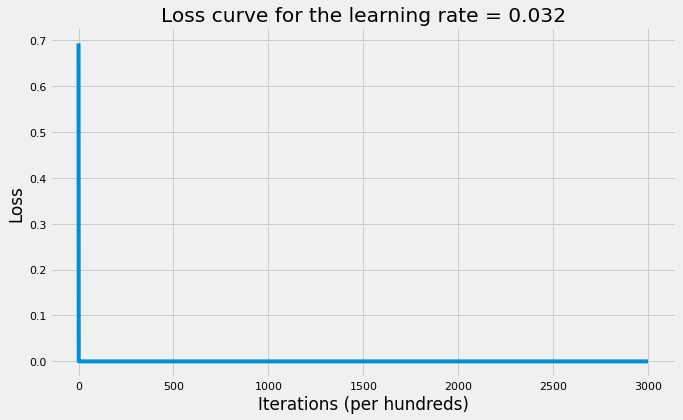

In [ ]:
# NN with relu activation fn
parameters_relu = L_layer_model(
    X_train, y_train, layers_dims, learning_rate=0.2, num_iterations=150000, num_iterations1=2,
    hidden_layers_activation_fn="relu")

# Print the accuracy
accuracy(X_test, parameters_relu, y_test, activation_fn="relu")